In [13]:
import pandas as pd
import numpy as np
import sys
import os
from matplotlib import pyplot as plt

import tensorflow as tf
from gensim.models import Word2Vec

In [3]:
class TF_Agent():
    
    def __init__(self, keys):
        self._initialize(keys)
        
    def _initialize(self, keys):
        np.random.seed(0)
        self.log_df = pd.DataFrame({key: [] for key in keys})
        self.keys = self.log_df.columns
        self.interesting = ",".join(self.log_df.columns)
        self.iter_count = 0     

    def set_batch(self, n, feed_dict):
        
        keys = list(feed_dict.keys())
        
        data_n = len(feed_dict[keys[0]])
        indices = np.random.choice(range(data_n), n, replace=False)
        
        feed_dict = {key: feed_dict[key][indices] for key in keys}
        self.feed_dict = feed_dict
    
    def run_session(self, sess):
        
        values = sess.run(eval(self.interesting),
                          feed_dict=self.feed_dict)
        
        self.recent_log = pd.Series(values, index=self.keys)
        self.log_df = self.log_df.append([self.recent_log])
        
        self.iter_count += 1
        
    def trace(self, args, one_line_text=""):
        
        iter_count = self.iter_count
        deco = ["-", "\\", "|", "/"][iter_count%4]
        
        one_line_text = "Iter: % 6d"%iter_count
        for arg in args:
            one_line_text += " %s %s: %0.9f"%(
                deco, arg, self.recent_log[arg]
            )

        sys.stdout.write("\r%s"%one_line_text)

In [86]:
def get_Xy(df, model):

    def tune_size(i, words):
        length = len(words)
        words = [model.wv[word] for word in words]
        if i%100 == 0:
            percent = i/data_n*100
            sys.stdout.write("\r% 5.2f%%"%(percent))
        return np.array(words+placeholder[length:])

    maxi = max(len(text.split()) for text in df["review"])
    placeholder = [np.array([0]*100)]*maxi
    model = pd.read_pickle("./data/underscore_wv")
    
    X = np.array([tune_size(i, words)
                  for i, words in enumerate(sent_se)])
    sys.stdout.write("\r% 5.2f%%"%100)
    
    y = np.array([[1, 0] if l == "neg" else [0, 1] for l in df["label"]])
    
    return X, y

35290


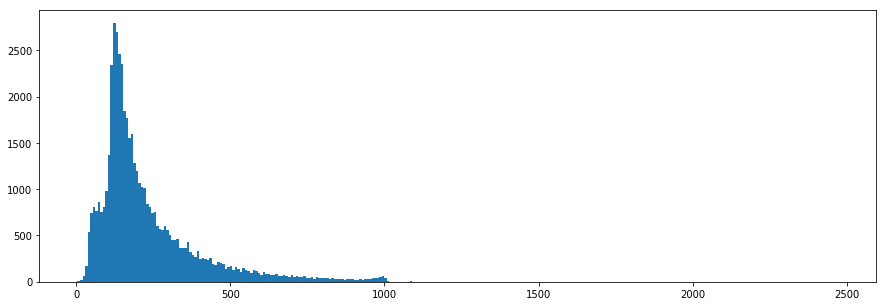

In [100]:
max_length = 250

df = pd.read_pickle("./data/preprocessed_df")
df = df[df["label"] != "unsup"]

lengths = [len(words.split()) for words in df["review"]]
df = df.iloc[[False if l > max_length else True for l in lengths]]
data_n = len(df)
print(data_n)

sent_se = pd.Series([words.split() for words in df["review"]])

plt.figure(figsize=[15, 5])
plt.hist(lengths, bins=300)
plt.show()

In [111]:
def save_batch_csv(df , type_, n):
    df = df[df["type"] == type_]
    pos_df = df[df["label"] == "pos"]
    neg_df = df[df["label"] == "neg"]
    df = pd.concat([pos_df[:n//2], neg_df[:n//2]])
    df.to_csv("./data/batch_of_%s.csv"%type_)

save_batch_csv(df, "test", 2000)
save_batch_csv(df, "train", 8000)